In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.28648447, -0.12818166, -0.33648243, -0.25123072, -0.39053441,
         1.17106366, -0.76400743, -0.66532857, -0.92275858,  0.51418527],
       [ 0.82422244,  1.34670269,  0.95978896, -0.43940594, -0.40048845,
         0.5944893 , -2.19884771,  1.23761504, -0.28611368,  1.98526731]])

In [4]:
test_Features[:2]

array([[-0.7117184 , -0.53811705, -0.22010155,  0.49873506,  0.1994687 ,
         0.45432092,  0.02512521, -0.48314584, -0.49359994,  0.76978603],
       [ 1.81895753, -0.4839296 , -0.47169585, -0.30265069, -0.30275787,
        -3.38219622,  2.06876441,  0.21769807,  0.84715738, -0.27119061]])

In [5]:
train_Label[:4]

array([1, 0, 1, 0])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=30*5,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=30*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=30*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=30*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=30,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(10, activation='tanh'))

In [22]:
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 150)           300       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 150)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 120)           18120     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 120)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 90)            10890     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 90)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 60)            5460      
__________

In [24]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 7s 685us/step - loss: 0.5682 - acc: 0.7419 - val_loss: 0.4546 - val_acc: 0.7866
Epoch 2/30
10194/10194 [==============================] - 5s 523us/step - loss: 0.4112 - acc: 0.8138 - val_loss: 0.3721 - val_acc: 0.8329
Epoch 3/30
10194/10194 [==============================] - 5s 515us/step - loss: 0.3600 - acc: 0.8517 - val_loss: 0.3548 - val_acc: 0.8525
Epoch 4/30
10194/10194 [==============================] - 5s 521us/step - loss: 0.3445 - acc: 0.8603 - val_loss: 0.3478 - val_acc: 0.8517
Epoch 5/30
10194/10194 [==============================] - 5s 511us/step - loss: 0.3360 - acc: 0.8621 - val_loss: 0.3434 - val_acc: 0.8525
Epoch 6/30
10194/10194 [==============================] - 5s 513us/step - loss: 0.3334 - acc: 0.8630 - val_loss: 0.3429 - val_acc: 0.8513
Epoch 7/30
10194/10194 [==============================] - 5s 511us/step - loss: 0.3311 - acc: 0.8624 - val_loss: 0.3387 - v

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

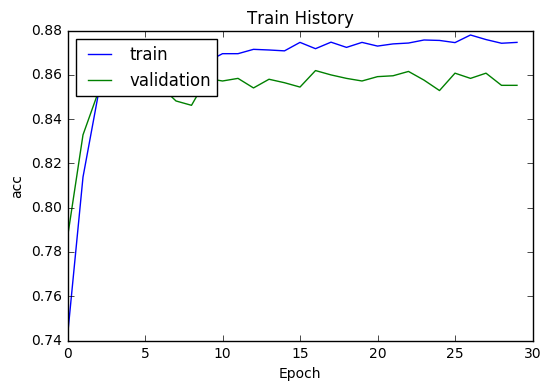

In [27]:
show_train_history(train_history,'acc','val_acc')

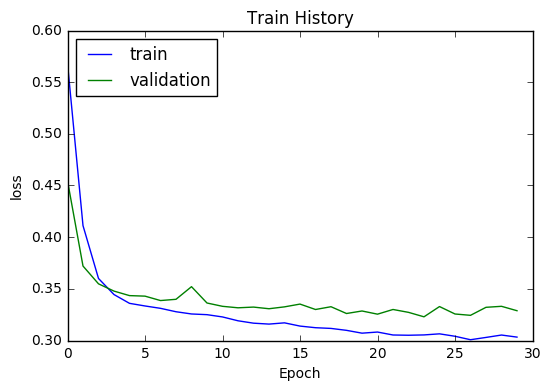

In [28]:
show_train_history(train_history,'loss','val_loss')

In [29]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 215us/step


In [30]:
scores[1]

0.8607615102756093